# MIMIC III Data Visualization

This notebook contains visualizations based on the MIMIC III Demo dataset.

Link to google colab that contains code : https://colab.research.google.com/drive/1G9pKaEweHT3pUuFG84M_prU2SNGepHiH?usp=sharing

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload each dataset individually
print("Upload DIAGNOSES_ICD.csv")
uploaded = files.upload()
diagnoses = pd.read_csv(list(uploaded.keys())[0])

print("Upload ADMISSIONS.csv")
uploaded = files.upload()
admissions = pd.read_csv(list(uploaded.keys())[0])

print("Upload PATIENTS.csv")
uploaded = files.upload()
patients = pd.read_csv(list(uploaded.keys())[0])

print("Upload PRESCRIPTIONS.csv")
uploaded = files.upload()
prescriptions = pd.read_csv(list(uploaded.keys())[0])

print("Upload D_ICD_DIAGNOSES.csv")
uploaded = files.upload()
icd_name = pd.read_csv(list(uploaded.keys())[0])


Upload DIAGNOSES_ICD.csv


Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD (4).csv
Upload ADMISSIONS.csv


Saving ADMISSIONS.csv to ADMISSIONS (4).csv
Upload PATIENTS.csv


Saving PATIENTS.csv to PATIENTS (4).csv
Upload PRESCRIPTIONS.csv


Saving PRESCRIPTIONS.csv to PRESCRIPTIONS (4).csv
Upload D_ICD_DIAGNOSES.csv


Saving D_ICD_DIAGNOSES.csv to D_ICD_DIAGNOSES (2).csv


In [105]:
print("Upload DIAGNOSES_ICD.csv")
uploaded = files.upload()
diagnoses = pd.read_csv(list(uploaded.keys())[0])

Upload DIAGNOSES_ICD.csv


Saving DIAGNOSES_ICD.csv to DIAGNOSES_ICD (5).csv


In [106]:
diagnoses

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,112344,10006,142345,1,99591
1,112345,10006,142345,2,99662
2,112346,10006,142345,3,5672
3,112347,10006,142345,4,40391
4,112348,10006,142345,5,42731
...,...,...,...,...,...
1756,397673,44228,103379,7,1975
1757,397674,44228,103379,8,45182
1758,397675,44228,103379,9,99592
1759,397676,44228,103379,10,2449


In [107]:
diagnoses_merged = pd.merge(diagnoses, icd_name, on='icd9_code')
diagnoses_merged["icd9_code_title"] = diagnoses_merged['icd9_code'] + ": " + diagnoses_merged['short_title']

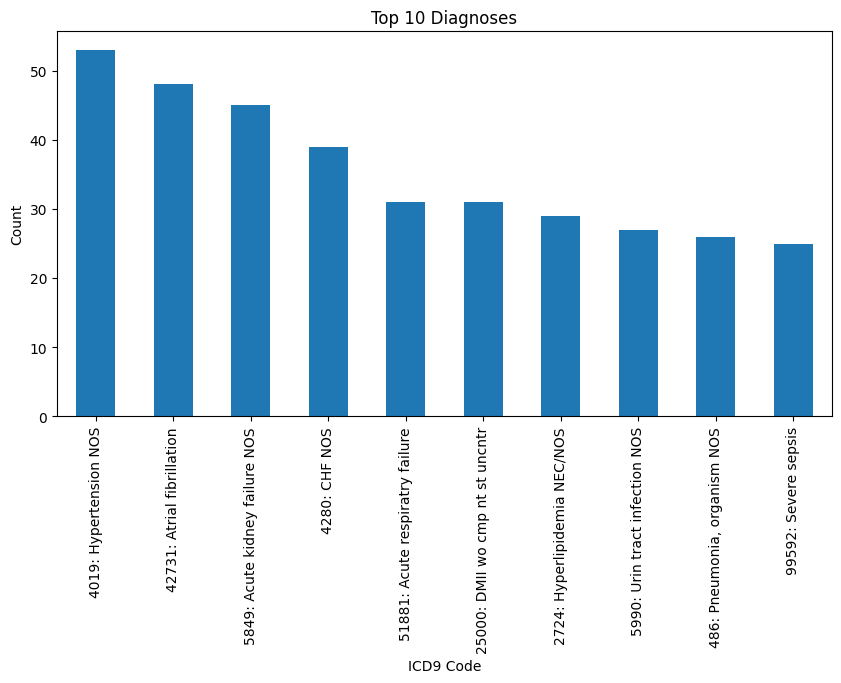

In [108]:
# 1. Distribution of Diagnoses
top_diagnoses = diagnoses_merged['icd9_code_title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_diagnoses.plot(kind='bar')
plt.title('Top 10 Diagnoses')
plt.xlabel('ICD9 Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

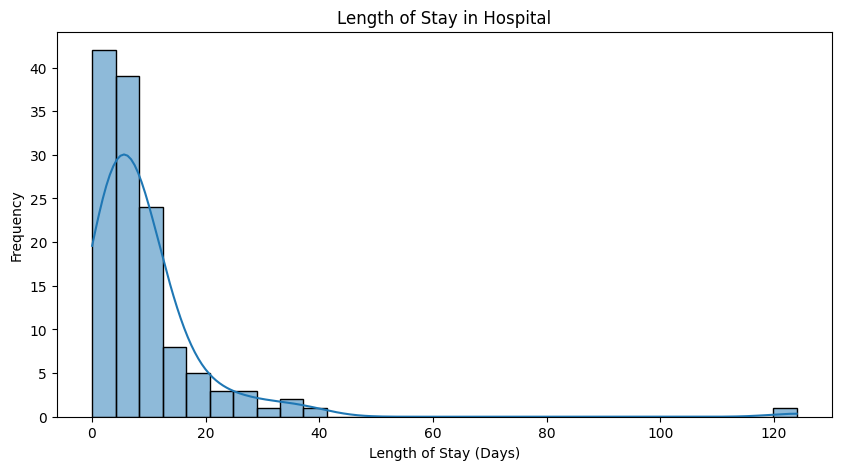

In [109]:
# Convert admittime and dischtime to datetime
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

# Calculate Length of Stay (LOS) in days
admissions['LOS'] = (admissions['dischtime'] - admissions['admittime']).dt.total_seconds() / (24 * 60 * 60)

# Plot Length of Stay distribution
plt.figure(figsize=(10, 5))
sns.histplot(admissions['LOS'].dropna(), bins=30, kde=True)  # Drop NaNs if any
plt.title('Length of Stay in Hospital')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

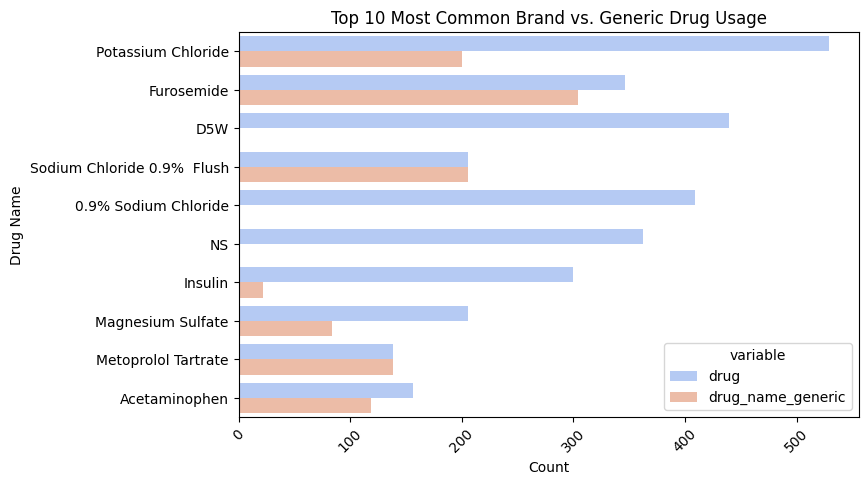

In [120]:
# Comparison of Brand vs. Generic Drug Usage
plt.figure(figsize=(8, 5))
generic_vs_brand = prescriptions[['drug', 'drug_name_generic']].melt()
sns.countplot(y='value', data=generic_vs_brand, palette='coolwarm', order=generic_vs_brand['value'].value_counts().index[:10], hue='variable')
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.title('Top 10 Most Common Brand vs. Generic Drug Usage')
plt.show()

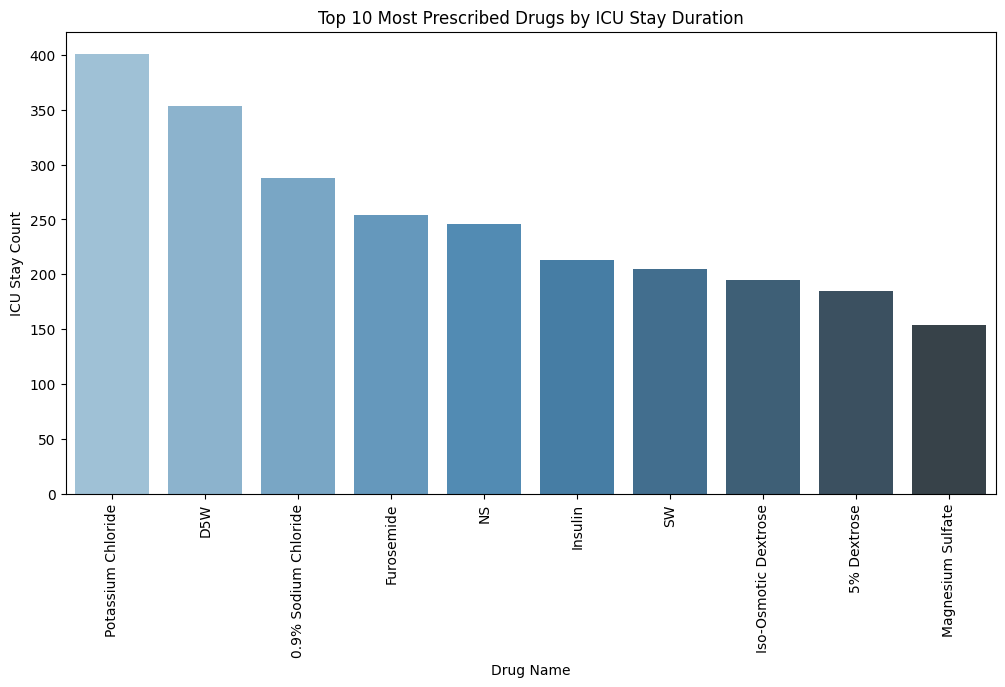

In [118]:
### Top 10 Most Prescribed Drugs by ICU Stay Duration ###
top_drugs = prescriptions.groupby("drug")["icustay_id"].count().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette="Blues_d", hue=top_drugs.index)
plt.xticks(rotation=90)
plt.title("Top 10 Most Prescribed Drugs by ICU Stay Duration")
plt.xlabel("Drug Name")
plt.ylabel("ICU Stay Count")
plt.show()

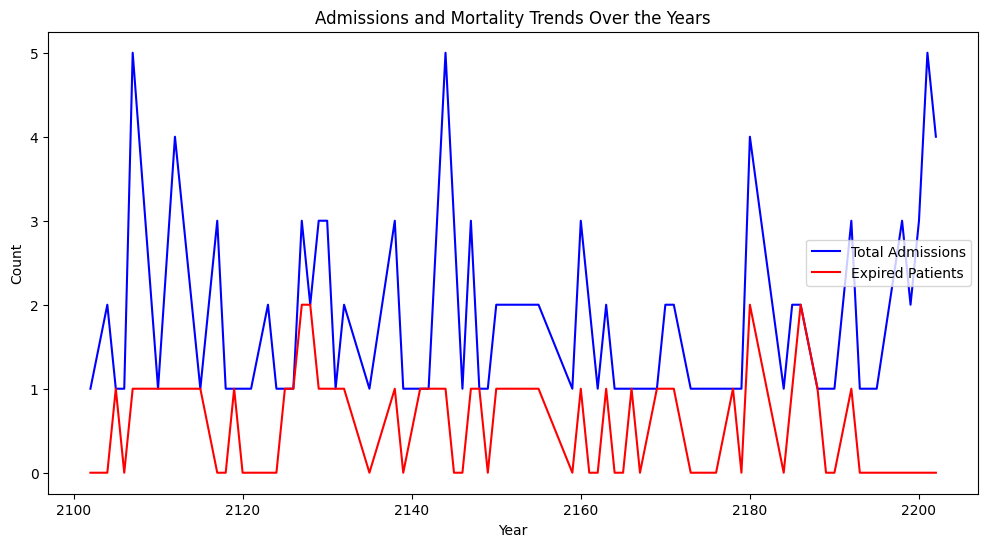

In [115]:
# Admissions and Mortality Trends Over the Years
admissions['admission_year'] = admissions['admittime'].dt.year
admissions['admission_year'] = pd.to_datetime(admissions['admission_year'], format='%Y')
admission_yearly = admissions.groupby('admission_year').agg(
    total_admissions=('hadm_id', 'count'),
    expired_patients=('hospital_expire_flag', lambda x: (x == 1).sum())
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=admission_yearly, x='admission_year', y='total_admissions', label='Total Admissions', color='blue')
sns.lineplot(data=admission_yearly, x='admission_year', y='expired_patients', label='Expired Patients', color='red')
plt.title('Admissions and Mortality Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


## Additional Plots below



In [99]:
import plotly.express as px

# Prepare the data for sunburst chart
admissions_sunburst = admissions.groupby(['ethnicity', 'admission_type', 'hospital_expire_flag']).size().reset_index(name='count')

# Create a sunburst plot
fig = px.sunburst(admissions_sunburst,
                  path=['ethnicity', 'admission_type', 'hospital_expire_flag'],
                  values='count',
                  title="Admissions and Mortality Breakdown by Ethnicity and Admission Type")
fig.show()


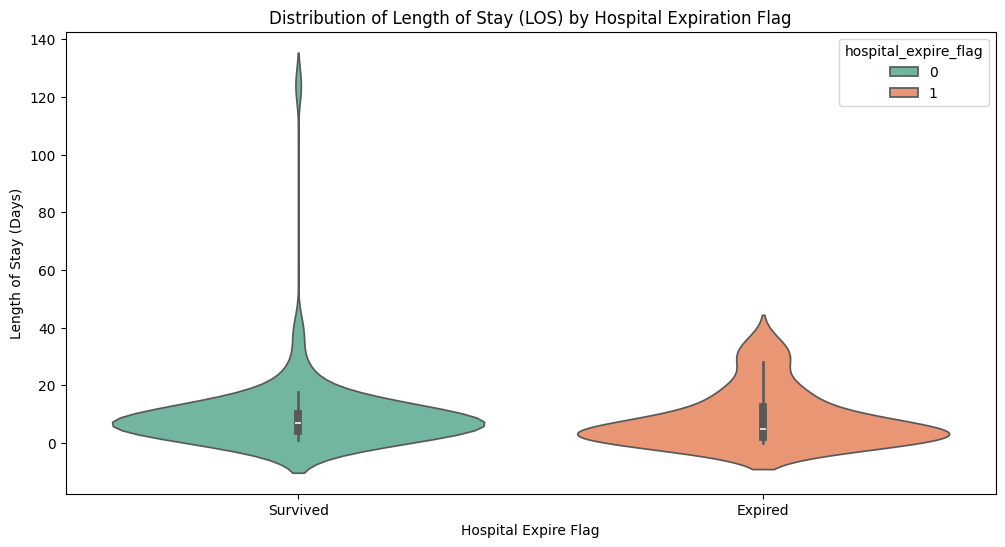

In [121]:
plt.figure(figsize=(12,6))
sns.violinplot(data=admissions, x='hospital_expire_flag', y='LOS', palette='Set2', hue='hospital_expire_flag')
plt.title('Distribution of Length of Stay (LOS) by Hospital Expiration Flag')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Length of Stay (Days)')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Expired'])
plt.show()
